# Welcome to the final project!
In this notebook you will be asked to use singular value decomposition and SVM to classify images. We will be working with the MNIST numbers dataset, where training data consist of pictures of digits, and the target value is the digit itself.

First, we import the necessary libraries.

In [1]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Now, we read both training and test dataset as arrays. 

In [2]:
data = np.load('mnist.npz')
X_test_total, X_train_total, y_train_total, y_test_total = data['x_test'], data['x_train'], data['y_train'], data['y_test']

Let's select two digits that we will be learning to separate, for example 3 and 8.

In [3]:
num1, num2 = 3, 8

Let us form the lists of indices i such that the target of i-th object of our training data is either num1 or num2. Do the same for the test dataset.

In [4]:
train_indx = [y == num1 or y == num2 for y in y_train_total] 
test_indx = [y == num1 or y == num2 for y in y_test_total]

Form new arrays consisting of the data with the target values num1 and num2 only. 

In [5]:
X_train, y_train = X_train_total[train_indx], y_train_total[train_indx]
X_test, y_test = X_test_total[test_indx], y_test_total[test_indx]

The following two cells ensure automatic grading.

In [6]:
import sys
sys.path.append("..")

import grading
grader = grading.Grader(assignment_key="5QcKcr06RZWNXOR6ZubzOg", 
                      all_parts=["EGrPV", "LtYil", "otUqA", "o4nIb", "rZkTW", "keYiw"])

In [7]:
# token expires every 30 min
COURSERA_TOKEN = "iOx1iuTfpgxPzdga"
COURSERA_EMAIL = "alex.nepochatov@gmail.com"

## Looking at the data

Let us check the sizes of the datasets and the shape of one image.

In [8]:
print('Data shapes: ')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

Data shapes: 
X_train:  (11982, 28, 28)
y_train:  (11982,)
X_test:  (1984, 28, 28)
y_test:  (1984,)


In [9]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

n_train, n_test

(11982, 1984)

In [10]:
print('Shape of one item: ')
print(X_train[0].shape)

Shape of one item: 
(28, 28)


Train data are images of digits.

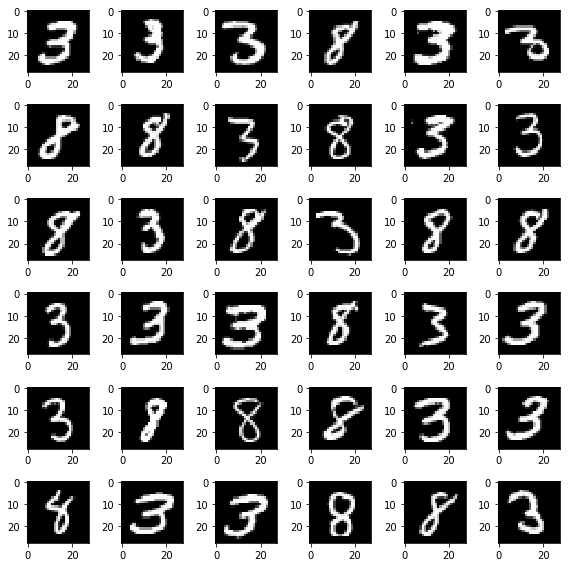

In [11]:
plt.figure(figsize=(8, 8))
a, b = 6, 6
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    plt.imshow(X_train[i], cmap='gray')
plt.tight_layout()
plt.show()

Target values are numbers.

In [12]:
print(y_train[:36])

[3 3 3 8 3 3 8 8 3 8 3 3 8 3 8 3 8 8 3 3 3 8 3 3 3 8 8 8 3 3 8 3 3 8 8 3]


## Task 1 (1 point)
Now our data is 3-dimensional of shape (number of images, n_pixels, n_pixels). To work with PCA and SVM we need to flatten the images by turning each of them into an array of shape (n_pixels x n_pixels, ).

In [13]:
def flatten_image(X):
    num_pixels = X.shape[0] * X.shape[1]
    return X.reshape(num_pixels)

In [14]:
X_train_flat = np.array([flatten_image(img) for img in X_train])
X_test_flat = np.array([flatten_image(img) for img in X_test])
X_test_flat.shape, X_test_flat.shape

((1984, 784), (1984, 784))

PCA works best when the data is scaled (think, why?), so let's scale our data. We will use [StandartScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for it. Note, that scaling replaces a collection of vectors x by the collection of the vectors $x' = (x-M)/D$, where $M$ is the mean vector of
the sample, $D$ is the vector of standard deviations of all components of the vectors, and the division is component-wise. So, the scaled collection has the same size as the original one, and each column has 0 mean and unit standard deviation.


In [15]:
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

## Question 1

Please write your answer on the impact of scaling below. Why does scaling help PCA? If your idea need some computer experiments for confirmation (say, training and accuracy calculations  with non-scaled data), please provide the code here as well.

### Answer: ###
In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.
<br>
Suppose we have a dataset that includes many features our goal is a binary classification. The dataset includes some categorical variables  and some float or integer numbers. The first thing that we may do is to encode the categorical variables. For instance, if we have 100 locations in your dataset, the common way is to encode them from 0 to 99. Now if we use one features in millionss, this feature would have a much higher variance and thus higher standard deviation. Remember that we use square value of the difference from mean to calculate the variance. A bigger scale would create bigger values and square of a big value grow faster.
<br>
But it does not mean that this feature carry significantly more information compared to another features. In this example, however, PCA would give a very high weight to the first feature and perhaps the weights of categorical features would almost drop to 0. If we normalize our features, it provides a fair comparison between the explained variance in the dataset. So, it is good practice to normalize the mean and scale the features before using PCA.

In [16]:
# WITHOUT SCALING

X_train_flat = np.array([flatten_image(img) for img in X_train])
X_test_flat = np.array([flatten_image(img) for img in X_test])

pca = PCA(n_components=128, random_state=42)
X_train_flat = pca.fit_transform(X_train_flat)
X_test_flat = pca.transform(X_test_flat)

clf = LinearSVC(random_state=42)
clf.fit(X_train_flat, y_train) 

y_pred = clf.predict(X_test_flat) # your code here
acc_without_sc = accuracy_score(y_pred, y_test) # your code here

# WITH SCALING
X_train_flat = np.array([flatten_image(img) for img in X_train])
X_test_flat = np.array([flatten_image(img) for img in X_test])


scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

pca = PCA(n_components=128, random_state=42)
X_train_flat = pca.fit_transform(X_train_flat)
X_test_flat = pca.transform(X_test_flat)

clf = LinearSVC(random_state=42)
clf.fit(X_train_flat, y_train) 

y_pred = clf.predict(X_test_flat) # your code here
acc_with_sc = accuracy_score(y_pred, y_test) # your code here

print("Test accuracy without scaling: ", acc_without_sc)
print("Test accuracy with scaling: ", acc_with_sc)

Test accuracy without scaling:  0.944556451613
Test accuracy with scaling:  0.96622983871


We see that with scaling, the accuracy is higher.
<br>
<br>

There is also a great example in the sklearn library documentation itself:


Prediction accuracy for the normal test dataset with PCA
81.48%


Prediction accuracy for the standardized test dataset with PCA
98.15%



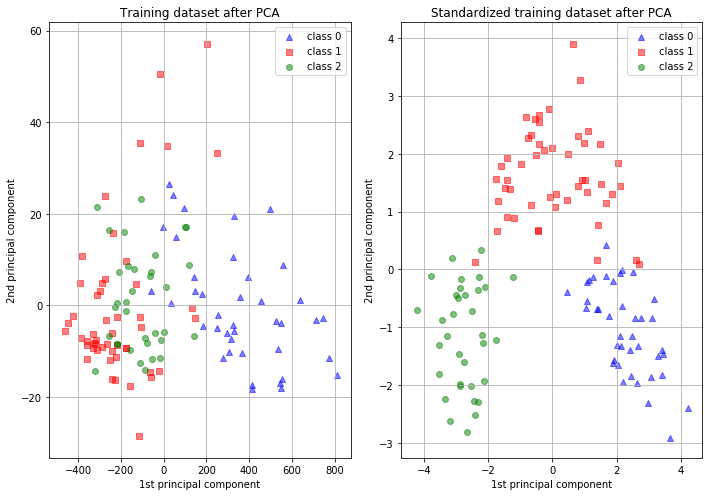

In [40]:
# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB

RANDOM_STATE = 42
FIG_SIZE = (10, 7)

features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=RANDOM_STATE
)

# Fit to data and predict using pipelined GNB and PCA
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print("\nPrediction accuracy for the normal test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test):.2%}\n")

print("\nPrediction accuracy for the standardized test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test_std):.2%}\n")

# Extract PCA from pipeline
pca = unscaled_clf.named_steps["pca"]
pca_std = std_clf.named_steps["pca"]

# Show first principal components
# print(f"\nPC 1 without scaling:\n{pca.components_[0]}")
# print(f"\nPC 1 with scaling:\n{pca_std.components_[0]}")

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)

scaler = std_clf.named_steps["standardscaler"]
scaled_X_train = scaler.transform(X_train)
X_train_std_transformed = pca_std.transform(scaled_X_train)

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

plt.tight_layout()

plt.show()

Now, we call PCA and reduce the number of components for each vector. 

In [63]:
pca = PCA(n_components=128, random_state=42)
X_train_flat = pca.fit_transform(X_train_flat)

In [64]:
X_test_flat = pca.transform(X_test_flat)

In [65]:
X_test_flat.shape, X_test_flat.shape

((1984, 128), (1984, 128))

## Question 2

What is the ratio of the memory used for the data `compressed' by PCA and the one used for the original data?

### Answer: ###
<br>
dataset size before compression 1984*784
<br>
dataset size after compression 1984*128
<br>
the ratio will be as follows:
<br>
(1984 * 784)/(1984 * 128) = 6.125

Now, we use SVM with linear kernel to separate the two classes.

In [66]:
%%time
clf = LinearSVC(random_state=42)
clf.fit(X_train_flat, y_train) 

CPU times: user 2.21 s, sys: 108 ms, total: 2.31 s
Wall time: 2.31 s


Now, let us make the predictions and calculate the accuracy, that is, the ratio of the true predictions to the test sample size.  Use [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) as the quality metric here.

$$accuracy(y\_true, y\_pred) = \frac{1}{n}\sum_{i=1}^n [y\_true_i=y\_pred_i],$$ where $[a=b]=1$, if $a=b$, and $0$ otherwise.

In [67]:
y_pred = clf.predict(X_test_flat) 
acc = accuracy_score(y_pred, y_test) 
print("Test accuracy: ", acc)

Test accuracy:  0.96622983871


In [83]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("EGrPV", acc)

In [50]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


## Try it from your own input
Try to make your own dataset. You can either make a photo image of an ink-written digit or draw a digit using a graphical editor of your computer or smartphone. Note that the input picture has to be a white number on a black background, like the numbers in the MNIST dataset. It can be either in png or jpeg format. Replace the sample striwith your file name. 

In [68]:
from scipy import misc
from PIL import Image

In [69]:
image = Image.open('my_number_3_1.png').convert('L')
new_image = image.resize((28, 28))
custom = np.array(new_image)
custom.shape

(28, 28)

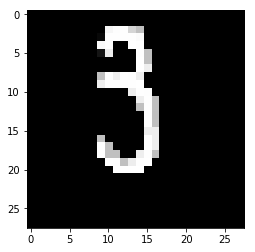

In [70]:
plt.imshow(custom, cmap='gray')
plt.show()

Re-shape your image and make a prediction. 

In [71]:
custom = flatten_image(custom).reshape(1, -1)
custom = scaler.transform(custom)
custom = pca.transform(custom)
custom.shape

(1, 128)

In [73]:
print(*clf.predict(custom))

3


## Question 3

Repeat the above digit recognition procedure with other 5 to 10 hand-written images. Do your experiments confirm the above accuracy estimate? How do you think, why they confirm (or not confirm) it?

The results match well for the number "3" and badly for the number "8". Apparently this is a consequence of the fact that all these numbers are drawn in Paint by the same person. And for the number 8 to match, I had to specifically make it look like those in the training sample, the proportions of the number on the black field are very much affected, if the number occupies almost the entire space from top to bottom, then we get an incorrect result.

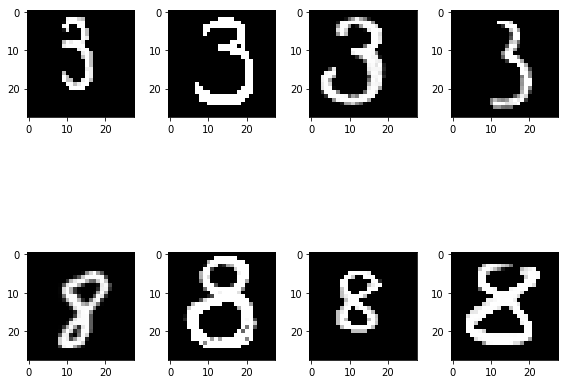

Number on image = 3 => predicted number = 3 => Correct
Number on image = 3 => predicted number = 3 => Correct
Number on image = 3 => predicted number = 3 => Correct
Number on image = 3 => predicted number = 3 => Correct
Number on image = 8 => predicted number = 8 => Correct
Number on image = 8 => predicted number = 3 => Wrong
Number on image = 8 => predicted number = 8 => Correct
Number on image = 8 => predicted number = 3 => Wrong


In [75]:
image_1 = Image.open('my_number_3_1.png').convert('L')
image_2 = Image.open('my_number_3_2.png').convert('L')
image_3 = Image.open('my_number_3_3.png').convert('L')
image_4 = Image.open('my_number_3_4.png').convert('L')
image_5 = Image.open('my_number_8_1.png').convert('L')
image_6 = Image.open('my_number_8_2.png').convert('L')
image_7 = Image.open('my_number_8_3.png').convert('L')
image_8 = Image.open('my_number_8_4.png').convert('L')

new_image_1 = image_1.resize((28, 28))
new_image_2 = image_2.resize((28, 28))
new_image_3 = image_3.resize((28, 28))
new_image_4 = image_4.resize((28, 28))
new_image_5 = image_5.resize((28, 28))
new_image_6 = image_6.resize((28, 28))
new_image_7 = image_7.resize((28, 28))
new_image_8 = image_8.resize((28, 28))

plt.figure(figsize=(8,8))
plt.subplot(2, 4, 1)
plt.imshow(new_image_1)
plt.subplot(2, 4, 2)
plt.imshow(new_image_2)
plt.subplot(2, 4, 3)
plt.imshow(new_image_3)
plt.subplot(2, 4, 4)
plt.imshow(new_image_4)
plt.subplot(2, 4, 5)
plt.imshow(new_image_5)
plt.subplot(2, 4, 6)
plt.imshow(new_image_6)
plt.subplot(2, 4, 7)
plt.imshow(new_image_7)
plt.subplot(2, 4, 8)
plt.imshow(new_image_8)
plt.tight_layout()
plt.show()

numbers_array = [new_image_1,
                 new_image_2,
                 new_image_3,
                 new_image_4,
                 new_image_5,
                 new_image_6,
                 new_image_7,
                 new_image_8]

count = 0
for new_image in numbers_array:
    custom = np.array(new_image)
    custom = flatten_image(custom).reshape(1, -1)
    custom = scaler.transform(custom)
    custom = pca.transform(custom)
    predict = clf.predict(custom)[0]
    count += 1
    number = 3 if count <=4 else 8
    answer = "Correct" if number == predict else "Wrong"
    print('Number on image =', number, '=> predicted number =', predict,'=>', answer)

## Task 2
Now let's try another approach explained [here](https://intranet.math.vt.edu/ugresearch/Lassiter_2012_2013.pdf) in Section 3. For each digit, we create a new matrix $A$ whose columns are flattened images of this digit. The first several (say, 10) columns of the matrix $U$ from SVD decomposition of $A$ represent a collection of "typical" images of this digit. Given an unrecognized flatten image, among average typical flattened images we find the closets one. Its target value is considered as a prediction for the target of the unrecognized image.

## SVD refesher
As you may recall from the lectures, SVD of a matrix $A$ is a decomposition:
$A = U \Sigma V^T,$ where $U$ and $V$ are orthogonal matrices. In this method we will be utilizing some properties of SVD.
Please note that due to large shapes of matrices the operations might take a while.

In [76]:
def getSingularVectorsLeft(matrix, number=10): # let's take first 10 numbers
    U, _, __ = svd(matrix)
    return U[:, :number] # return first _number_ columns of U from SVD of _matrix_

In [77]:
def getSingularImage(X_train, y_train, number):
    select_images = X_train[[i == number for i in y_train]]
    A = None 
    
    for image in select_images:
                if A is None:
            A = np.array([flatten_image(image)]).T
        else:
            A = np.append(A, np.array([flatten_image(image)]).T, axis=1)

    left_basis = getSingularVectorsLeft(A)

    return left_basis

Try it first on "0".

In [78]:
left_basis = getSingularImage(X_train_total, y_train_total, 0)

assert left_basis.shape, (784, 10)

### Task 2.1 (1 point)
Plot first 9 singular images of the digit 0 taking columns of matrix U and reshaping them back into images 28x28. Use `numpy.reshape`.

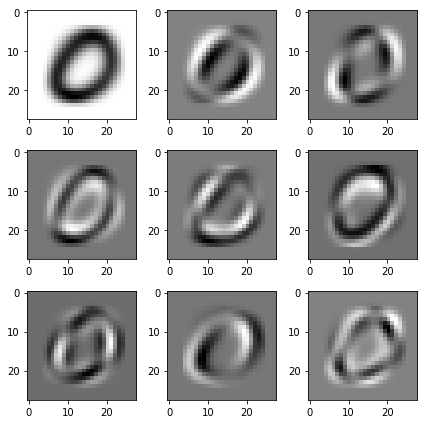

In [79]:
#singular images
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    img = left_basis[:, i].reshape((28, 28))  # ith element of left basis reshaped back to 28x28
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [79]:
## GRADED PART, DO NOT CHANGE!
#9th image will be graded:
grader.set_answer("LtYil", img[:, 5:7].flatten())

In [80]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


## Question 4

Reflect on properties of the columns of $U_k$. What properties do you think are contained in each of them? Draw more singular images to help you make conclusions.

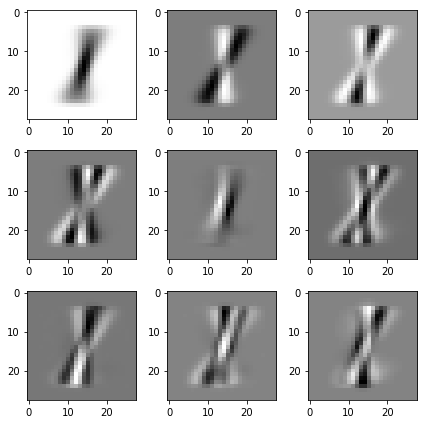

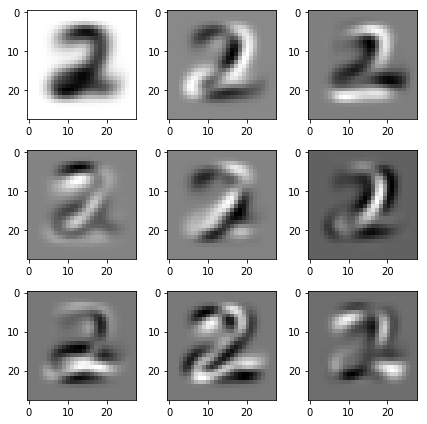

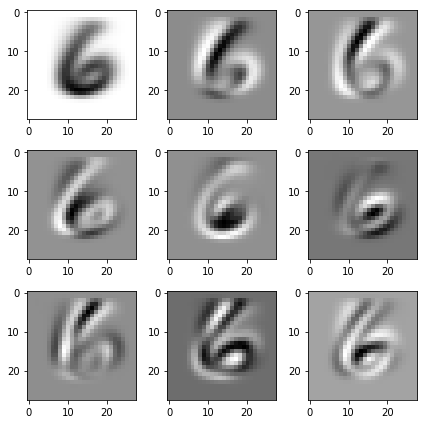

In [83]:
#singular images for 1

left_basis = getSingularImage(X_train_total, y_train_total, 1)

assert left_basis.shape, (784, 10)

plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    img = left_basis[:, i].reshape((28, 28))  # ith element of left basis reshaped back to 28x28
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

#singular images for 2

left_basis = getSingularImage(X_train_total, y_train_total, 2)

assert left_basis.shape, (784, 10)

plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    img = left_basis[:, i].reshape((28, 28))  # ith element of left basis reshaped back to 28x28
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

#singular images for 6

left_basis = getSingularImage(X_train_total, y_train_total, 6)

assert left_basis.shape, (784, 10)

plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    img = left_basis[:, i].reshape((28, 28))  # ith element of left basis reshaped back to 28x28
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

***Answer***
<br>
The first k columns of the matrix $U$ represent a collection of "typical" images of this digit. Each column of $U_k$ contain a data that describes the contrast of each pixel of the image. The first column of $U$ corresponds to the maximum eigenvalue in the SVD. Following columns correspond to smaller eigenvalues in decreasing order.

Now let's move on and obtain singular images for all numbers. The matrices $U_k$ from  [the article](https://intranet.math.vt.edu/ugresearch/Lassiter_2012_2013.pdf) are represented as `number_basis_matrices[k]`.
This might take a while to finish, feel free to add debug print in your function to know the progress.

In [84]:
# use getSingularImage funciton to get matrices for all numbers
number_basis_matrices = [getSingularImage(X_train_total, y_train_total, i) for i in range(10)] 

### Task 2.2 (1 point)
Plot the first singular image of each digit, similarly to the previous task.

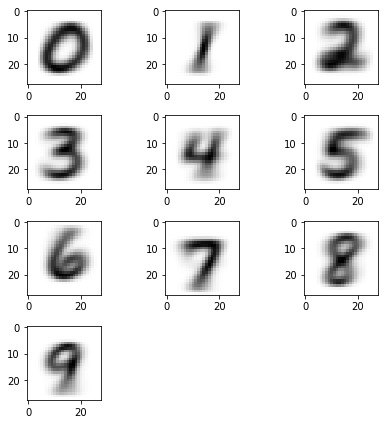

In [85]:
plt.figure(figsize=(6,6))
a, b = 3, 4
for i in range(10):  
    plt.subplot(b, a, i+1)
    # first column of U_k in number_basis_matrices[i] reshaped into 28x28 image
    img = np.reshape(number_basis_matrices[i][:, 0], (28, 28))  
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [83]:
## GRADED PART, DO NOT CHANGE!
#last image (of digit 9) will be graded:
grader.set_answer("otUqA", img[:, 5:7].flatten())

In [84]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


In [86]:
dim = number_basis_matrices[0].shape[0]

### Task 2.3 (1.5 points)

Here we calculate the new projection matrix for each $U_k$ to apply later in testing:
$pr = (I - U_k \cdot U_{k}^{T})$. Use `numpy.matmul` for matrix multiplication and `numpy.identity` to create an identity matrix. Please note that this operation might also take some time to finish.

In [87]:
numeric_values = [np.identity(number_basis_matrices[i].shape[0]) - (number_basis_matrices[i]).dot((number_basis_matrices[i]).T) for i in range(10)]
 # create an array of pr for each number

In [88]:
## GRADED PART, DO NOT CHANGE!
k = np.array([n[3:5, 3:13] for n in numeric_values])
grader.set_answer("o4nIb", k.flatten())

In [89]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


### Task 2.4 (1.5 points)
Implement function utilizing `numeric_values` matrices to predict labels for unknown images. Use `numpy.norm` and enumerate to iterate over numeric values.

In [88]:
def find_closest(test_value, numeric_values):
    stacked_test = test_value.reshape(-1, 1)
    minimun = np.Inf
    target = np.Inf
    # find closest U_k to test_value using norm and return the target digit
    for indx, matrx in enumerate(numeric_values):
        pr_ort = np.linalg.norm(np.dot(matrx, stacked_test))
    
        if pr_ort < minimun:
            minimun = pr_ort
            target = indx
    
    return target

In [ ]:
# find array of predictions for test values and calculate accuracy in the cell below
y_pred = np.array([find_closest(test_value, numeric_values) for test_value in X_test])

In [ ]:
acc = accuracy_score(y_test, y_pred)

In [100]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("rZkTW", acc)

In [101]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


## Additional task (2 points)
In the first task we trained Linear SVM to separate 3s and 8s. Here you can implement multiclass classification for _all_ numbers in `MNIST`. Use the same function LinearSVC for “one-vs-the-rest” multi-class strategy, see [the documentation](https://scikit-learn.org/stable/modules/svm.html#classification).  Follow the same steps from task 1: scaling, feature selection, training and testing. Is the accuracy of this method greater then the one calculated above?

**Note:** Use `random_state=42` for `PCA` and `LinearSVC`. Training `LinearSVC` on all the data might take a while, that's normal.

In [105]:
# flatten
X_train_flat = np.array([flatten_image(img) for img in X_train_total])
X_test_flat = np.array([flatten_image(img) for img in X_test_total])
X_train_flat.shape, X_test_flat.shape
# Scandart Scaler
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)
# PCA
pca = PCA(n_components=128, random_state=42)
X_train_flat = pca.fit_transform(X_train_flat)
X_test_flat = pca.transform(X_test_flat)
X_train_flat.shape, X_test_flat.shape
# LinearSVC
clf = LinearSVC(random_state=42)
clf.fit(X_train_flat, y_train_total)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [107]:
y_pred = clf.predict(X_test_flat)
acc = accuracy_score(y_test_total, y_pred)    # calculate accuracy
acc

0.90959999999999996

In [108]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("keYiw", acc)

In [109]:
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


#### Is the accuracy of this method greater then the one calculated above?
<br>
The prediction accuracy of 10 numbers is lower than the prediction accuracy of 2 numbers.